# **Άσκηση 1**

imports necessary for the exercise

In [2]:
import os
import numpy as np
import librosa
import scipy as sp
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import soundfile as sf
import string
from scipy import signal

In [3]:
#1.1
fs=8192 #suxnotita deigmatolipsias
t=np.linspace(0, 1000/fs,1000) #real-time axis
tones=[0,0,0,0,0,0,0,0,0,0]

tones[0]=np.sin(fs*0.7217*t)+np.sin(fs*1.0247*t) #afou exoume pragmatiko xrono, pollaplasiazoume me to fs
tones[1]=np.sin(fs*0.5346*t)+np.sin(fs*0.9273*t)
tones[2]=np.sin(fs*0.5346*t)+np.sin(fs*1.0247*t)
tones[3]=np.sin(fs*0.5346*t)+np.sin(fs*1.1328*t)
tones[4]=np.sin(fs*0.5906*t)+np.sin(fs*0.9273*t)
tones[5]=np.sin(fs*0.5906*t)+np.sin(fs*1.0247*t)
tones[6]=np.sin(fs*0.5906*t)+np.sin(fs*1.1328*t)
tones[7]=np.sin(fs*0.6535*t)+np.sin(fs*0.9273*t)
tones[8]=np.sin(fs*0.6535*t)+np.sin(fs*1.0247*t)
tones[9]=np.sin(fs*0.6535*t)+np.sin(fs*1.1328*t)

In [4]:
sd.play(tones[2],8192) #gia na tsekaroume ton ixo tou tonou

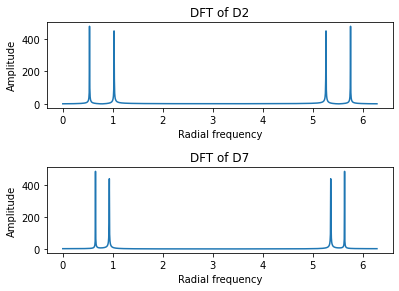

Max value of argument of D2 is at: 837
Max value of argument of D7 is at: 896


In [5]:
#1.2
D2 = np.fft.fft(tones[2])
D7 = np.fft.fft(tones[7])
f = np.linspace(0,2*np.pi,1000)


plt.subplot(2,1,1)
plt.plot(f,np.abs(D2))
plt.xlabel('Radial frequency')
plt.ylabel('Amplitude')
plt.title('DFT of D2')
print("")
print("")
plt.subplot(2,1,2)
plt.plot(f,np.abs(D7))
plt.xlabel('Radial frequency')
plt.ylabel('Amplitude')
plt.title('DFT of D7')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)

plt.show()



print('Max value of argument of D2 is at:',np.argmax((D2)))
print('Max value of argument of D7 is at:',np.argmax((D7)))

In [6]:
#1.3
#AM1=03118608
#AM2=03118125
#AM sum = 06236733
sfile = []

def sound(k): #prosthetoume to periexomeno kathe psifiou ston pinaka + ta 100 zitoumena midenika
    global sfile
    for i in k:
        sfile.append(i)
    for j in range(100):
        sfile.append(0.0)
    return


sound(tones[0]) #sfile gia ton AM sim
sound(tones[6])
sound(tones[2])
sound(tones[3])
sound(tones[6])
sound(tones[7])
sound(tones[3])
sound(tones[3])
sf.write('tone_sequence.wav',sfile,8192)

Windowed DFT of tone 1


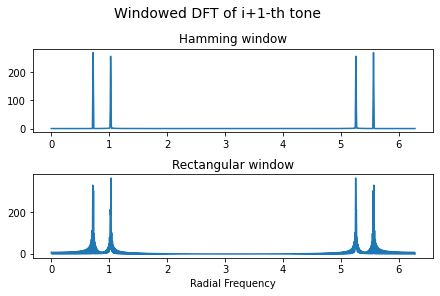

Windowed DFT of tone 2


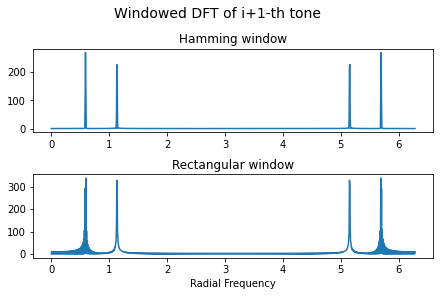

Windowed DFT of tone 3


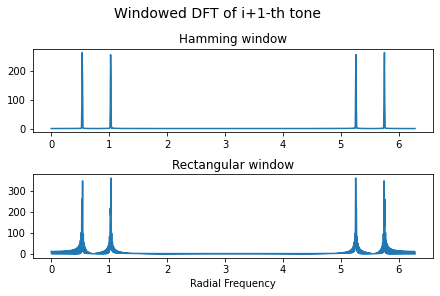

Windowed DFT of tone 4


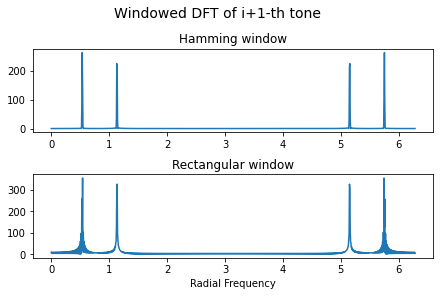

Windowed DFT of tone 5


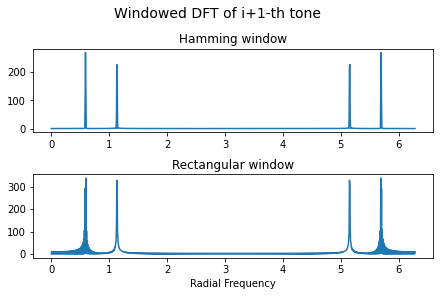

Windowed DFT of tone 6


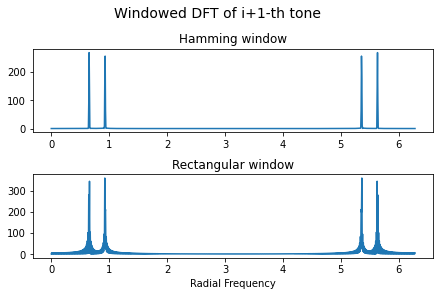

Windowed DFT of tone 7


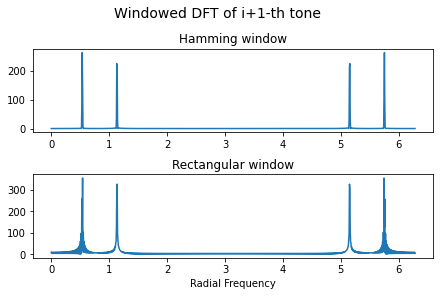

Windowed DFT of tone 8


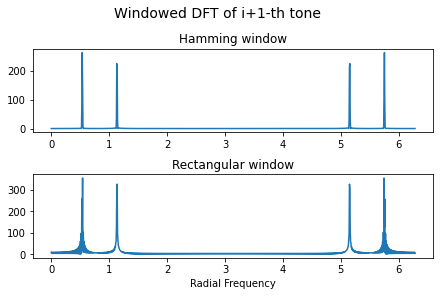

In [7]:
#1.4


for i in range (0,8):
   #hamming window
  window1=np.hamming(1000)
  DFT_H=np.fft.fft(sfile[1100*i:1100*i+1000]*window1) #pairnoume tin sfile apo 1.3 pou exei enopoihmena ta tones
  DFT_R=np.fft.fft(sfile[1100*i:1100*i+1000]*signal.square(f)) # prosexoume na paraleipsoume ta 100 endiamesa midenika 
  f = np.linspace(0,2*np.pi,1000)

  fig, axs = plt.subplots(2, constrained_layout=True) #2 grafikes gia kathe psifio->mia me hamming+mia me tetragwniko 
  fig.suptitle('Windowed DFT of i+1-th tone ', fontsize=14)
  axs[0].plot(f,np.abs(DFT_H)) 
  axs[0].set_title('Hamming window')
  axs[1].plot(f,np.abs(DFT_R))
  axs[1].set_title('Rectangular window')
  plt.xlabel('Radial Frequency') 
  print('Windowed DFT of tone',i+1 )
  plt.show()

In [8]:
#1.5

import heapq
DFT_peaks = {} #indexes olwn twn tones
Discrete_f= np.zeros((10,2)) #[0,2pi] suxnotites olwn twn tones
tones_2 = {}
y= {}


#ipologizei tin thesi tou kathe argmax(dld se poia timi tou xronou einai h max value)
for i in range(0,10):
    tones_2=tones[:500] #1-sided FFT
    #print(a)
    a=[ i
    for x, i
    in heapq.nlargest(         10,
        ((x, i) for i, x in enumerate(np.abs(np.fft.fft(tones_2[i])))))] #vgazei ta indexes twn 10 megaliterwn timwn(xamilo kai psilo)
    DFT_peaks[i]=a #tsekaroume gia ta 10 prwta, den einai ta 2 prwta aparaitita
 
#a=np.abs(np.fft.fft(tones_2[0]))
#print(a[])
    

for i in range(0,10):
    if(DFT_peaks[i][3]>500):      #paratiroume oti i timi gia to ipsisuxno vrisketai stin 2+1 thesi tou DFT peaks
        Discrete_f[i][0] = 2*np.pi-(2*np.pi*(DFT_peaks[i][3])/1000) #afairesi me 2pi gia metatropi se [0,pi]
    else :   
         Discrete_f[i][0] = (2*np.pi*(DFT_peaks[i][3])/1000)#afairesi me 2pi gia metatropi se [0,pi]
    if(DFT_peaks[i][1]>500): #paratiroume oti i timi gia to xamilosuxno vrisketai stin 1+1 thesi tou DFT peaks
        Discrete_f[i][1] = 2*np.pi-(2*np.pi*(DFT_peaks[i][1])/1000) #afairesi me 2pi gia metatropi se [0,pi]
    else :
         Discrete_f[i][1] = (2*np.pi*(DFT_peaks[i][1])/1000)
#genika o DTF_peaks exei prwta ta indexes gia to xamilosuxno kai meta gia to ipsisuxno (an deis...
#... tous DFT pio panw, ta xamila freqs einai ligo pio psila apo ta ipsila
    
#print(DFT_peaks)


for i in range(0,10): #printarw prwta psilo kai meta xamilo
    print("Indexes of tone",i,"are")
    print()
    a=0 #ipsisuxno index 
    b=0 #xamilosuxno index # apo ta indexes ta kratame mono ta <500 (1-sided FFT + ekmetalleusi simmetrias DFT)
    if(DFT_peaks[i][2]>500): #psila stin 3h thesi 
        a=1000-DFT_peaks[i][2]
    else:
        a=DFT_peaks[i][2]
    if(DFT_peaks[i][1]>500): #xamila stin 1h thesi (giati exoun ligo megalutero platos apo ta psila)
        b=1000-DFT_peaks[i][1]
    else:
        b=DFT_peaks[i][1]
    
    print(a,"",b)     
    print()
for i in range(0,10): #printarw prwta psilo kai meta xamilo
    print("Discrete freqs of tone",i,"are")
    print()
    
    print(Discrete_f[i][0], "", Discrete_f[i][1])
    print()

Indexes of tone 0 are

163  115

Indexes of tone 1 are

148  85

Indexes of tone 2 are

163  85

Indexes of tone 3 are

180  85

Indexes of tone 4 are

148  94

Indexes of tone 5 are

163  94

Indexes of tone 6 are

180  94

Indexes of tone 7 are

148  104

Indexes of tone 8 are

163  104

Indexes of tone 9 are

180  104

Discrete freqs of tone 0 are

1.0241592050702726  0.7225663103256524

Discrete freqs of tone 1 are

0.9299114254625787  0.5340707511102648

Discrete freqs of tone 2 are

1.0241592050702726  0.5340707511102648

Discrete freqs of tone 3 are

1.1309733552923253  0.5340707511102648

Discrete freqs of tone 4 are

0.9299114254625787  0.5906194188748811

Discrete freqs of tone 5 are

1.0241592050702726  0.5906194188748811

Discrete freqs of tone 6 are

1.1309733552923256  0.5906194188748811

Discrete freqs of tone 7 are

0.9299114254625788  0.6534512719466772

Discrete freqs of tone 8 are

1.0241592050702728  0.6534512719466771

Discrete freqs of tone 9 are

1.13097335529232

In [53]:
#1.6 + #1.7

import heapq
import soundfile

save_array=[]
calc_array=[]
energies=[]
output_array=[]
standard_energies=np.zeros(10)
a=[]
for i in range(0,10):
    a=np.abs(np.fft.fft(tones_2[i]))
    standard_energies[i]=(np.abs(a[DFT_peaks[i][1]]))**2 + (np.abs(a[DFT_peaks[i][2]]))**2
    #print(np.abs(a[DFT_peaks[i][1]]),np.abs(a[DFT_peaks[i][3]]))
#print(standard_energies)    

def ttcode(vector):
    test_array={}
    Peaks={}
    result=[]
    help_array=[]
    k=0 # metra to plithos twn psifiwn
    counter_before = 0 
    counter=0
    print()
    
    while (counter+2!=len(vector)): #sunthiki gia na teleiwsei to iteration
        i=1#counter stis while loops
        help_array=[] #proswrinos pinakas pou exei tin xrisimi pliroforia tou k-psifiou (xwris diladi ta midenika)
        counter_before=counter#krata tin value tou counter apo to proigoumeno while loop
        while(vector[counter_before+i]!=0): #prwta ta xrisima
            help_array.append(vector[counter_before+i]) #prosthetoume counter_before san offset
            i=i+1  
            counter=counter+1
            if(counter-counter_before>1000):break
            if(counter_before+i+1==len(vector)):break #if reached end of input array then break
        while(vector[i+counter_before]==0): #prwta ta xrisima meta ta midenika (gia kathe sima pou epeksergazomaste en prokeimenw)
            #help_array.append(vector[counter_before+i]) #den prosthetoume ta midenika
            i=i+1
            counter=counter+1  
            if(counter_before+i+1==len(vector)):break #if reached end of input array then break
                
        help_array=[0.0]+help_array #note kathe psifio arxize me ena mideniko to opoio prepei na prostethei  
        test_array=help_array #mporei na paralifthei san vima!
        w=[ i   #kratame indexes twn 10 megaliterwn simeiwn tou fft (opws kaname kai sto 1.5)
        for x, i 
        in heapq.nlargest(         4,
          ((x, i) for i, x in enumerate(abs(np.fft.fft(test_array)))))]
        if(w[3]==839):w[3]=837 #sto arxiko apotelesma eixe index sto 839/161 anti gia to 837/163 
        index_comp=0 #arithmos/psifio pou dinei h function se kathe while loop
        for i in range(0,10): #comparison me ta indexes tou 1.5 gia euresi psifiou
            if (((w[1]==DFT_peaks[i][1]) or (w[1]==1000-DFT_peaks[i][1])) and ((w[3]==DFT_peaks[i][3]) or (w[3]==1000-DFT_peaks[i][3]))):
                index_comp=i   
        result=result+[index_comp] #telikos arithmos pou antilamvanetai i function (teliko apotelesma)
        k=k+1
        #print(index_comp)
    print(result)
    print("")

print("Tones of sfile:")
ttcode(sfile)    #1.6
easysig=np.load("easySig.npy")
print("Tones of easySig:")
ttcode(easysig)
print("Tones of hardSig:")
hardsig=np.load("hardSig.npy")
ttcode(hardsig)


#method
#xwrizw tous tonous metaksu tous (prosoxi sta midenika) kai gia kathe tetoio diastima ypologizw energeia 
#(vriskw k kathe diastimatos + energeia)
#meta sugkrinw tin energeia kathe diastimatos me tin energeia kathe tonou apo standard_energies kai kanw mia antistoixisi

    

Tones of sfile:

[0, 6, 2, 3, 6, 7, 3, 3]

Tones of easySig:

[8, 1, 0, 3, 9, 6, 3, 8]

Tones of hardSig:

[4, 8, 1, 9, 2, 1, 5, 3, 6, 3]

